In [2]:
import numpy as np

# Load the 4 npy files
npy_files = ["all_sims_data_batch_0.npy", "all_sims_data_batch_1.npy", "all_sims_data_batch_2.npy", "all_sims_data_batch_3.npy", "all_sims_data_batch_4.npy", "all_sims_data_batch_5.npy", "all_sims_data_batch_6.npy", "all_sims_data_batch_7.npy", "all_sims_data_batch_8.npy", "all_sims_data_batch_9.npy", "all_sims_data_batch_10.npy", "all_sims_data_batch_11.npy", "all_sims_data_batch_12.npy"]  # Replace with actual filenames
arrays = [np.load(f) for f in npy_files]

# Concatenate along the first axis
final_array = np.concatenate(arrays, axis=0)  # Shape: (512, 20, 128, 128, 5)

# Save the concatenated array
np.save("reshaped_data.npy", final_array)


In [3]:
import json

# List of JSON files
json_files = [
    "sim_data_batch_0.json",
    "sim_data_batch_1.json",
    "sim_data_batch_2.json",
    "sim_data_batch_3.json",
    "sim_data_batch_4.json",
    "sim_data_batch_4.json",
    "sim_data_batch_5.json",
    "sim_data_batch_6.json",
    "sim_data_batch_7.json",
    "sim_data_batch_8.json",
    "sim_data_batch_9.json",
    "sim_data_batch_10.json",
    "sim_data_batch_11.json",
    "sim_data_batch_12.json"
]
hole_location_file = "Hole_Location_384.json"  # Special handling for this file

json_data = []

# Read and merge the first five JSON files
for f in json_files:
    with open(f, "r") as file:
        json_data.extend(json.load(file))  # Extend list to concatenate

# # Read the last JSON file and take only the last 384 entries
# with open(hole_location_file, "r") as file:
#     hole_location_data = json.load(file)[-384:]  # Take last 384 entries

# # Merge hole location data
# json_data.extend(hole_location_data)

# Save the merged JSON file
with open("merged_data.json", "w") as out_file:
    json.dump(json_data, out_file, indent=4)

print(f"Final merged JSON contains {len(json_data)} entries.")  # Debugging step


Final merged JSON contains 1792 entries.


In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
def plot_with_hole_white(
    trajectory, 
    channel_names=["ρ", "Ux", "Uy", "P", "mask"], 
    tol=1e-8
):
    """
    Plot each timestep of a trajectory such that any values whose absolute value
    is below a given tolerance are displayed as white (masked),
    while nonzero data use a normal colormap.

    Args:
        trajectory (np.ndarray): Array of shape (timesteps, height, width, channels).
        channel_names (list): Names for the channels.
        tol (float): Tolerance below which values are masked (shown as white).
    """
    # Create a copy of the viridis colormap
    cmap = matplotlib.cm.get_cmap('viridis').copy()
    # Masked values (those < tol in absolute value) will be plotted as white
    cmap.set_bad(color='white')

    n_timesteps = trajectory.shape[0]
    for t in range(n_timesteps):
        data = trajectory[t]  # shape: (height, width, channels)
        n_channels = data.shape[-1]
        
        fig, axes = plt.subplots(1, n_channels, figsize=(4*n_channels, 4))
        
        for ch in range(n_channels):
            # Mask out values whose absolute value is below 'tol'
            masked_channel = np.ma.masked_where(
                np.abs(data[:, :, ch]) < tol,
                data[:, :, ch]
            )
            
            # If you prefer colorbars to scale based on only the unmasked region:
            valid_vals = data[:, :, ch][np.abs(data[:, :, ch]) >= tol]
            if valid_vals.size > 0:
                vmin, vmax = valid_vals.min(), valid_vals.max()
            else:
                # If everything is below tol (i.e., fully masked), pick a small range
                vmin, vmax = 0, 1
            
            im = axes[ch].imshow(masked_channel, cmap=cmap, vmin=vmin, vmax=vmax)
            axes[ch].set_title(f"{channel_names[ch]} | Timestep {t}")
            axes[ch].axis("off")
            fig.colorbar(im, ax=axes[ch], fraction=0.046, pad=0.04)
        
        plt.tight_layout()
        plt.show()
        plt.close(fig)

/tmp/ipykernel_1644720/437628178.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('viridis').copy()


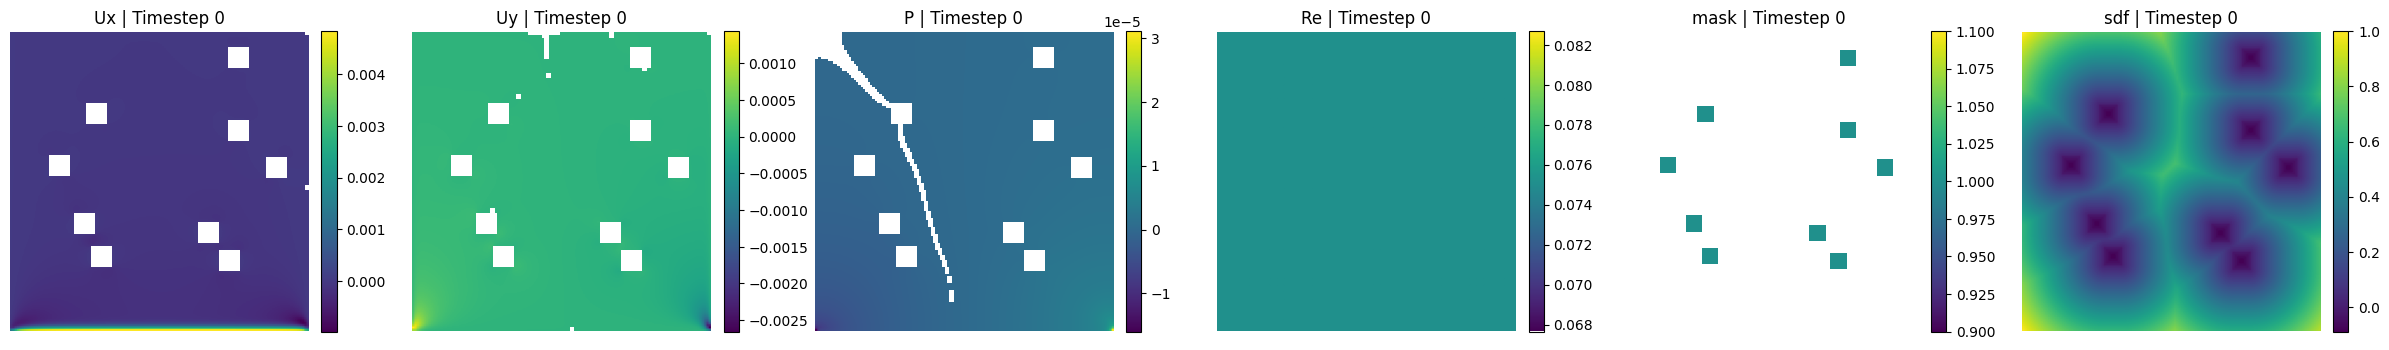

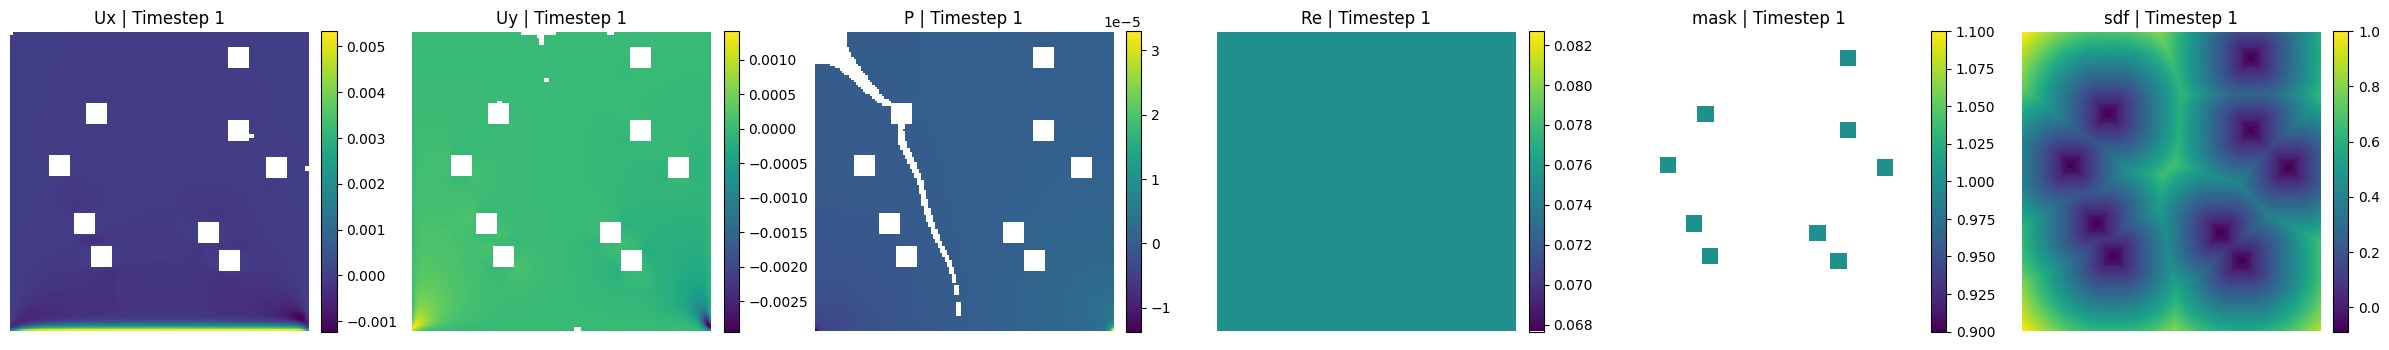

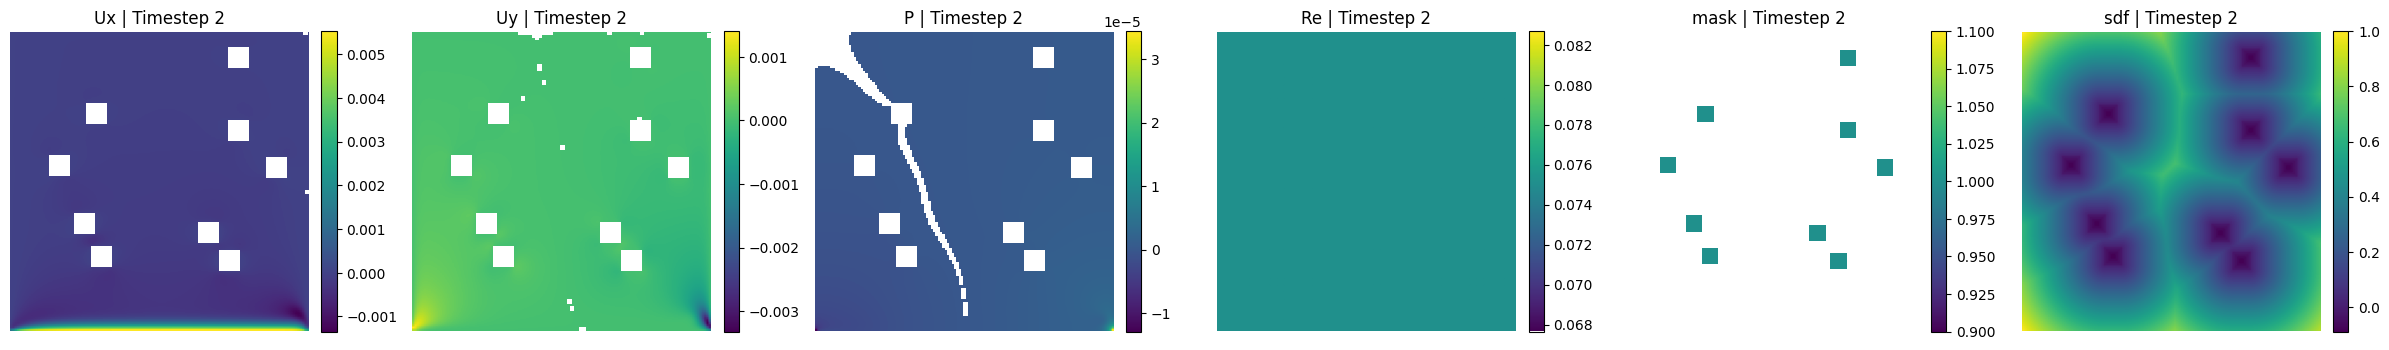

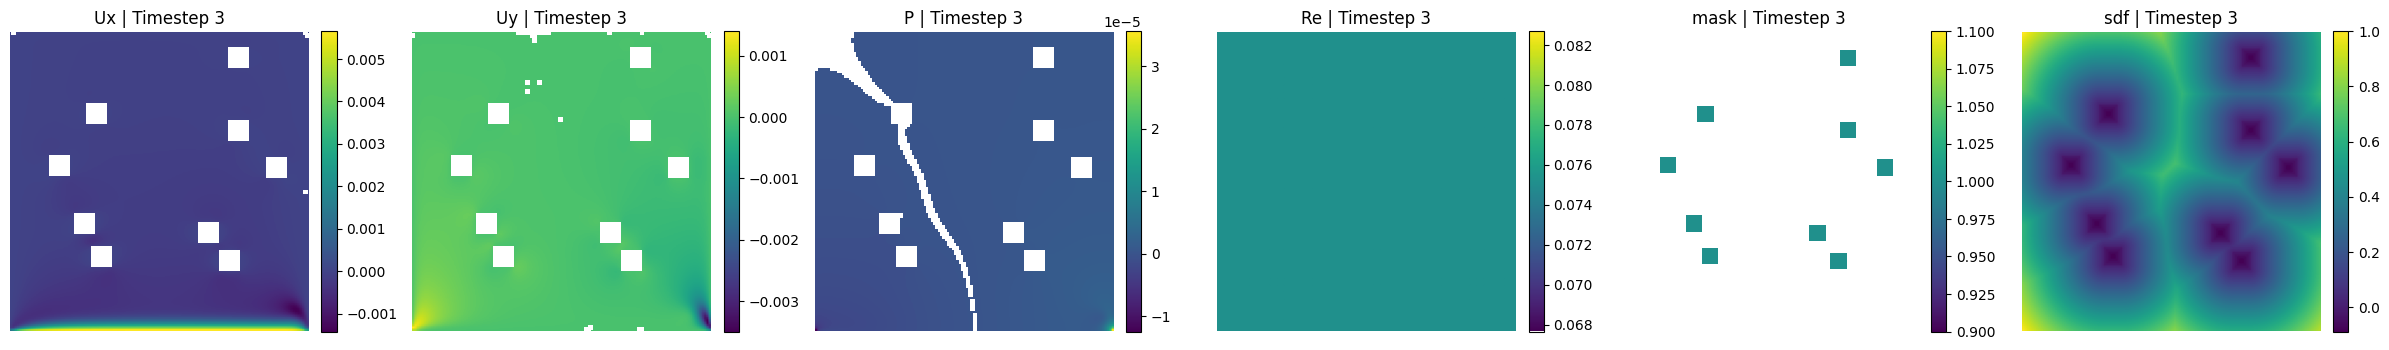

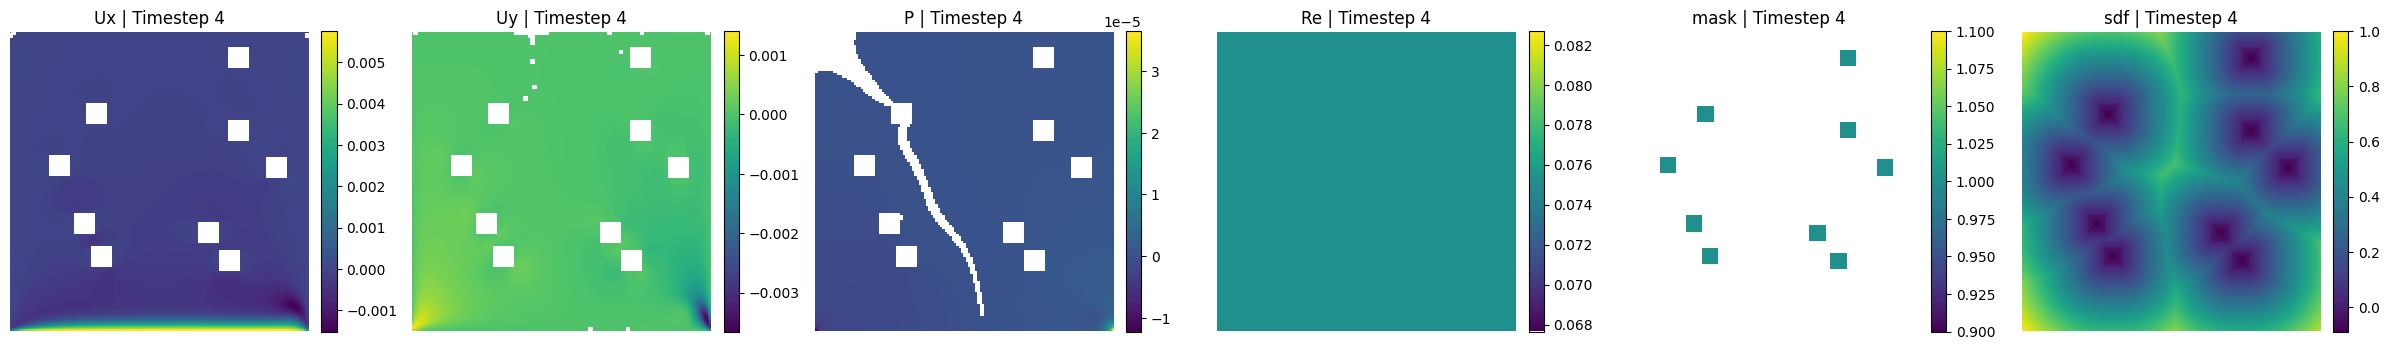

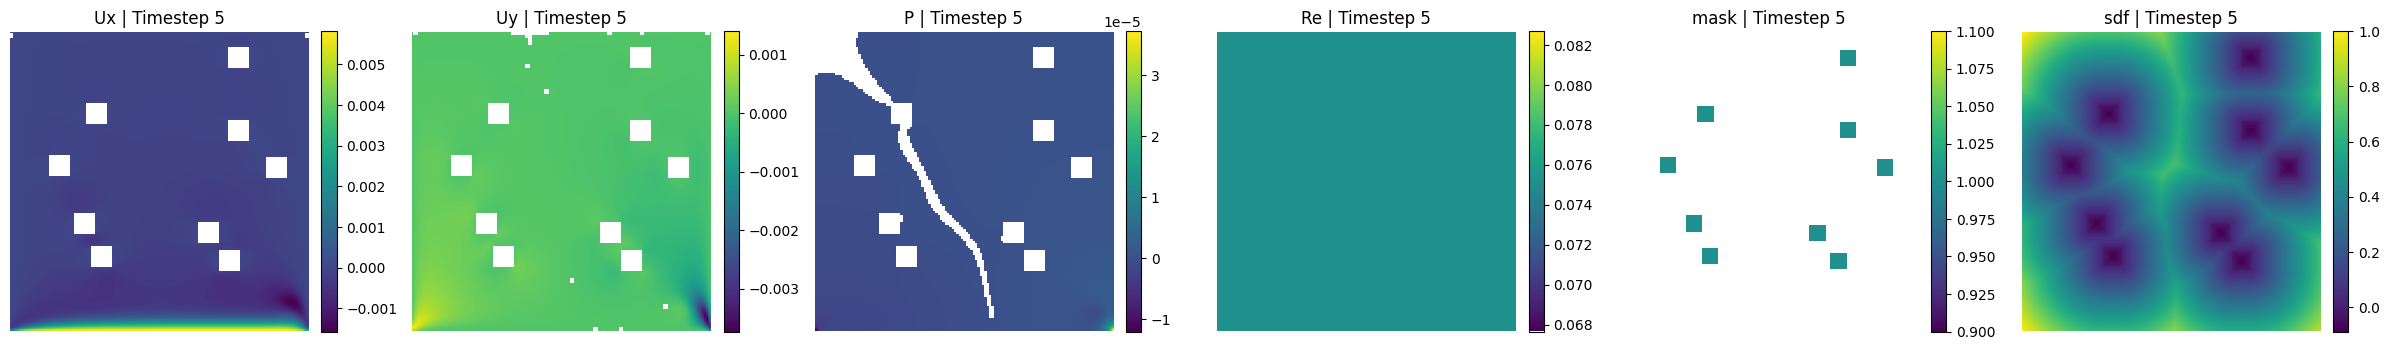

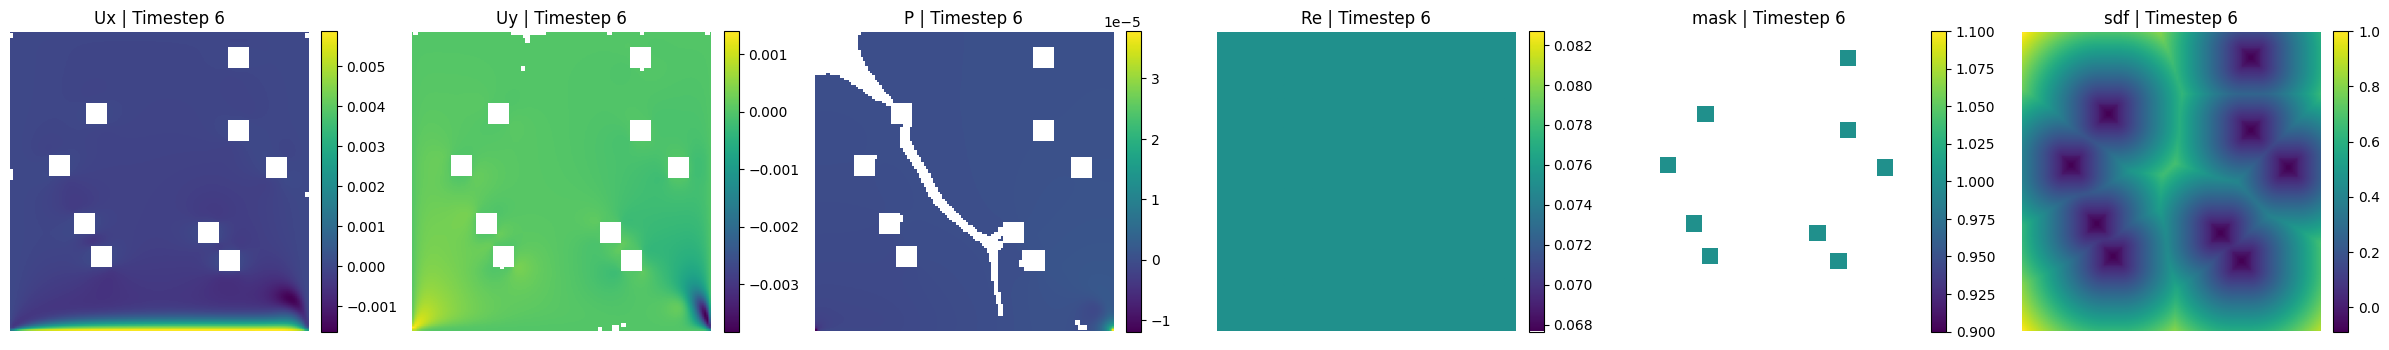

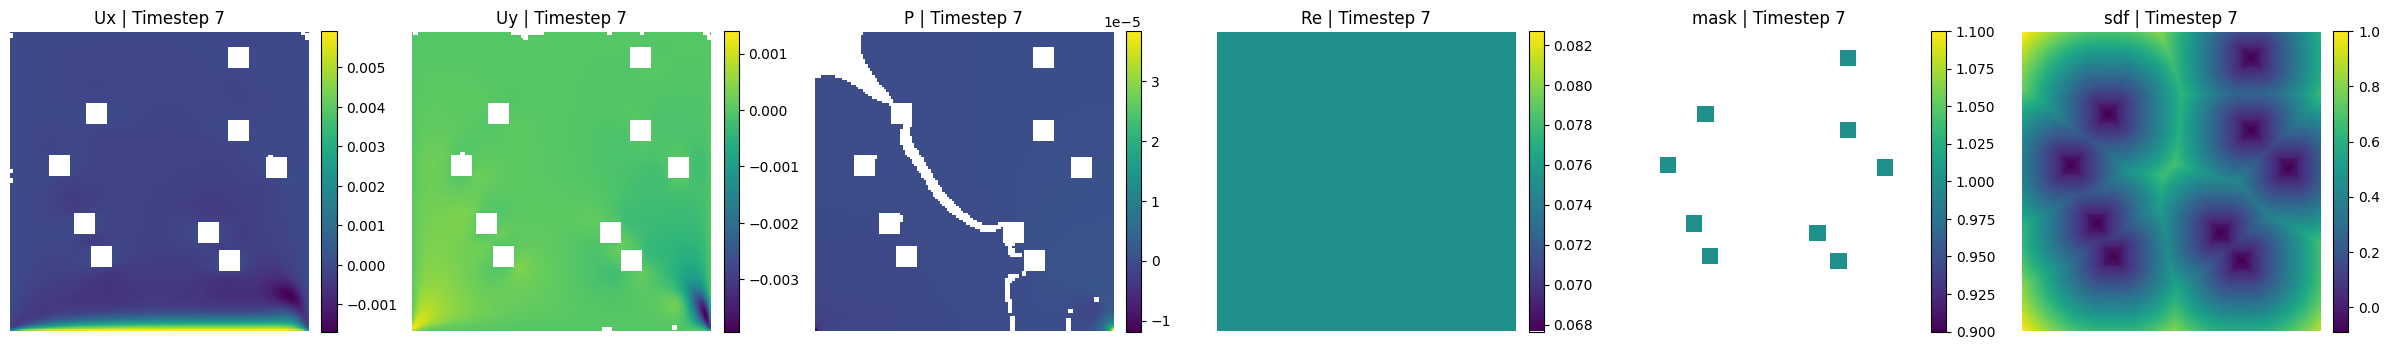

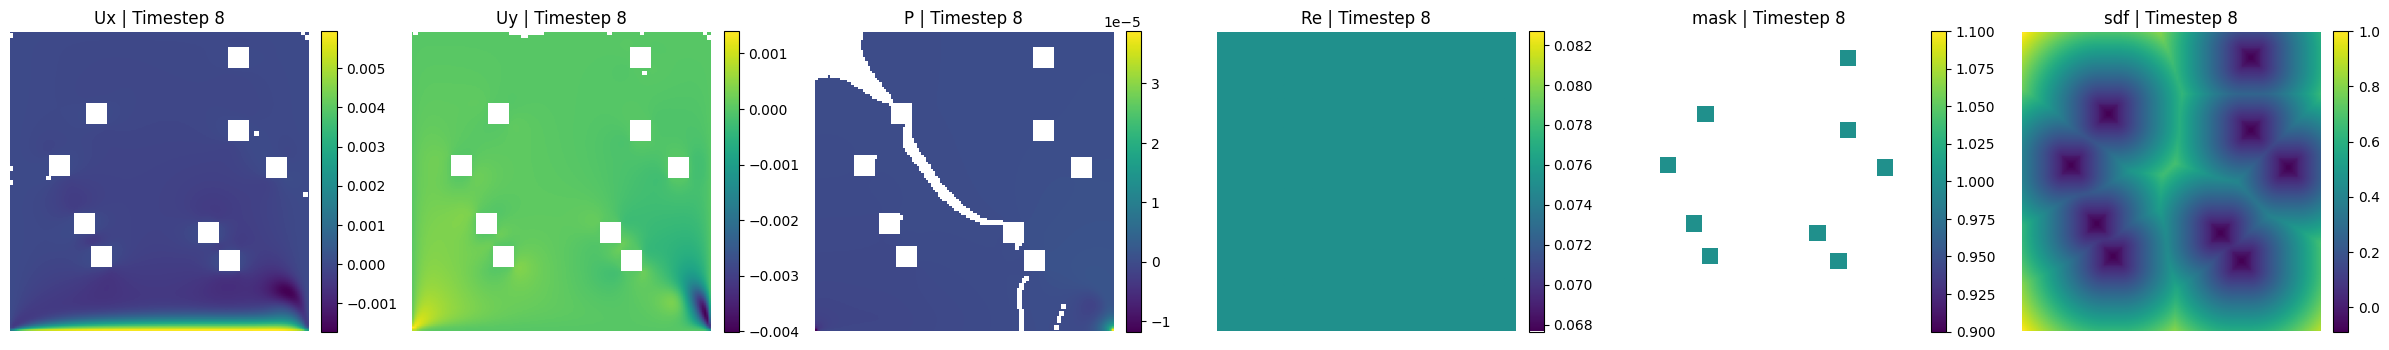

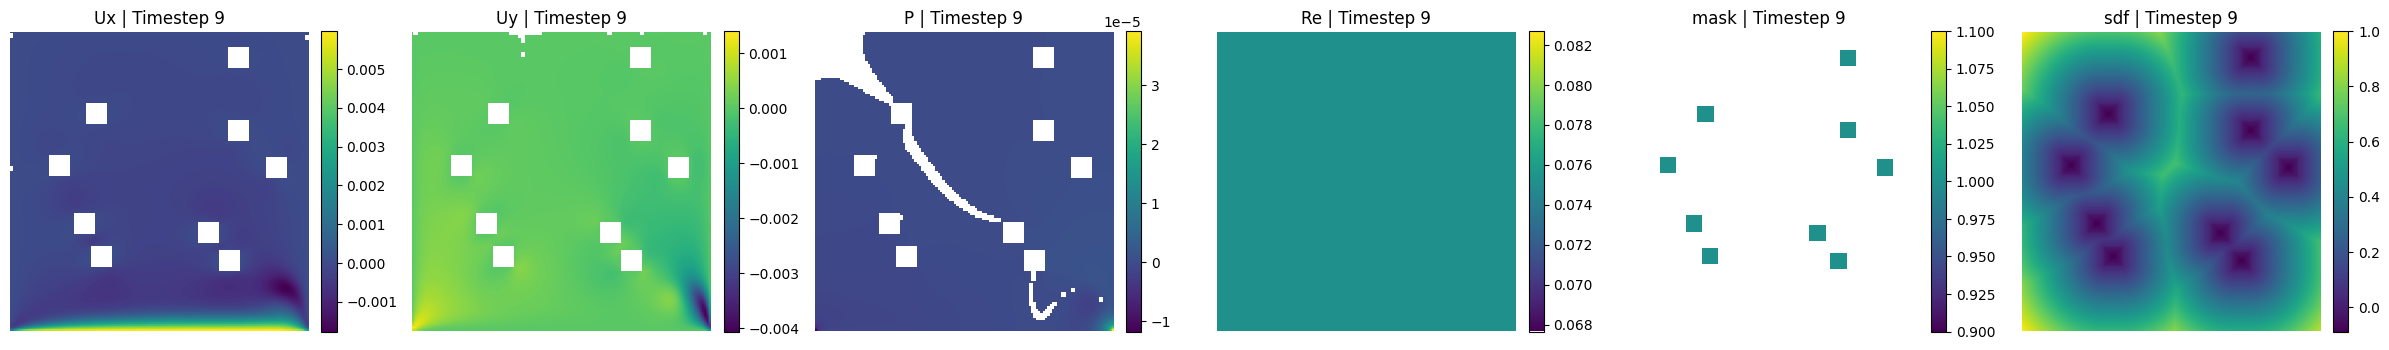

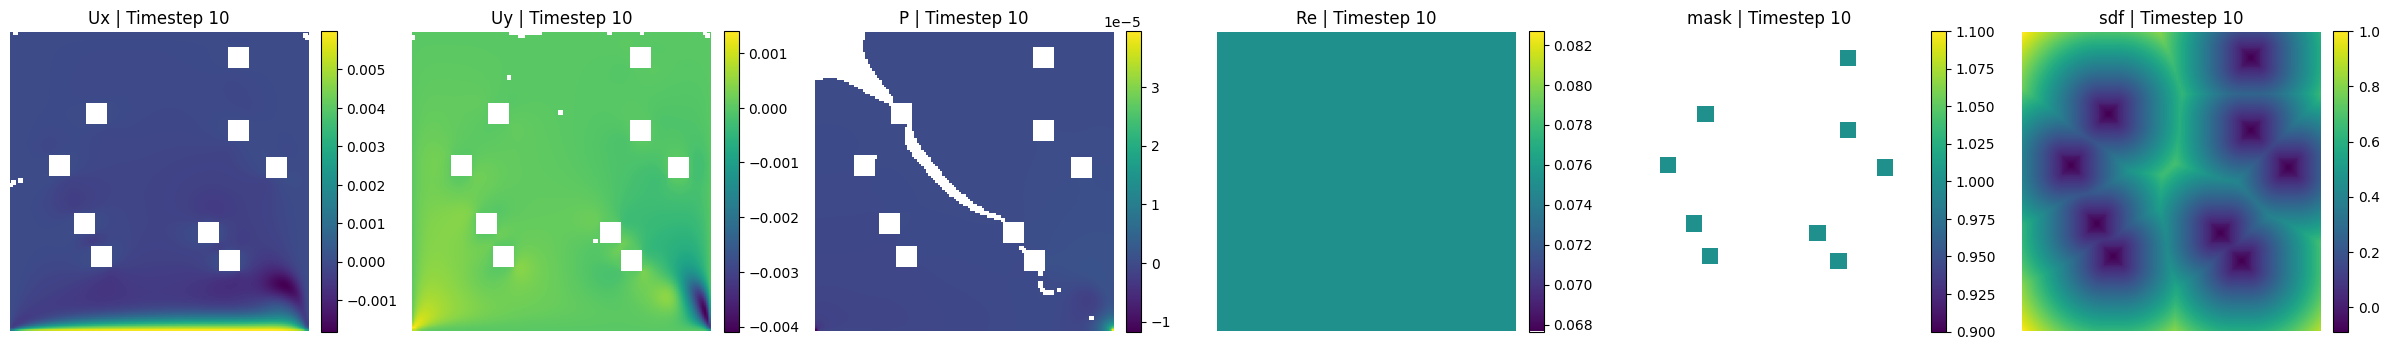

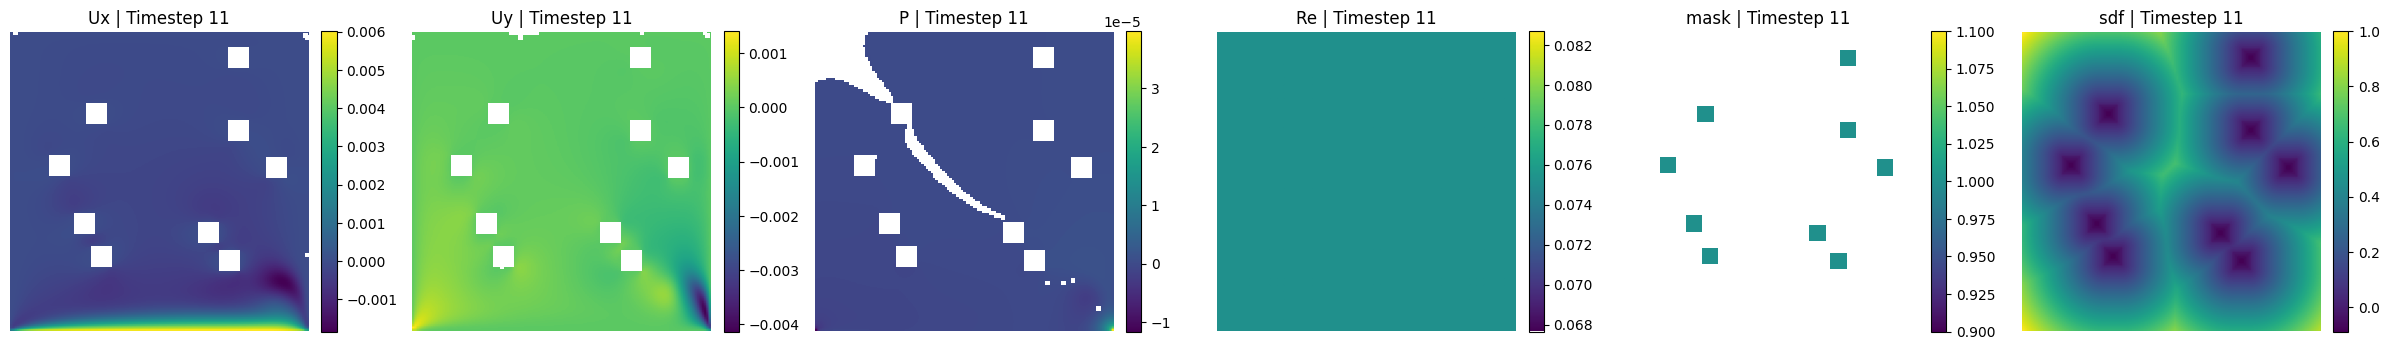

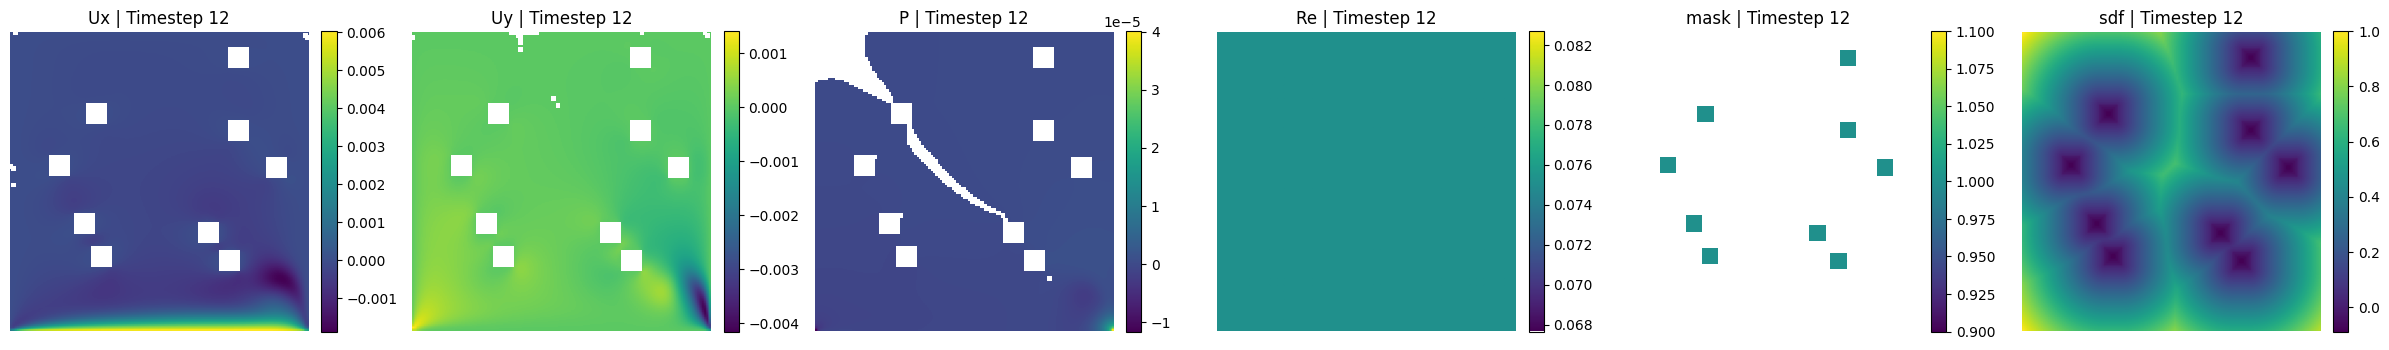

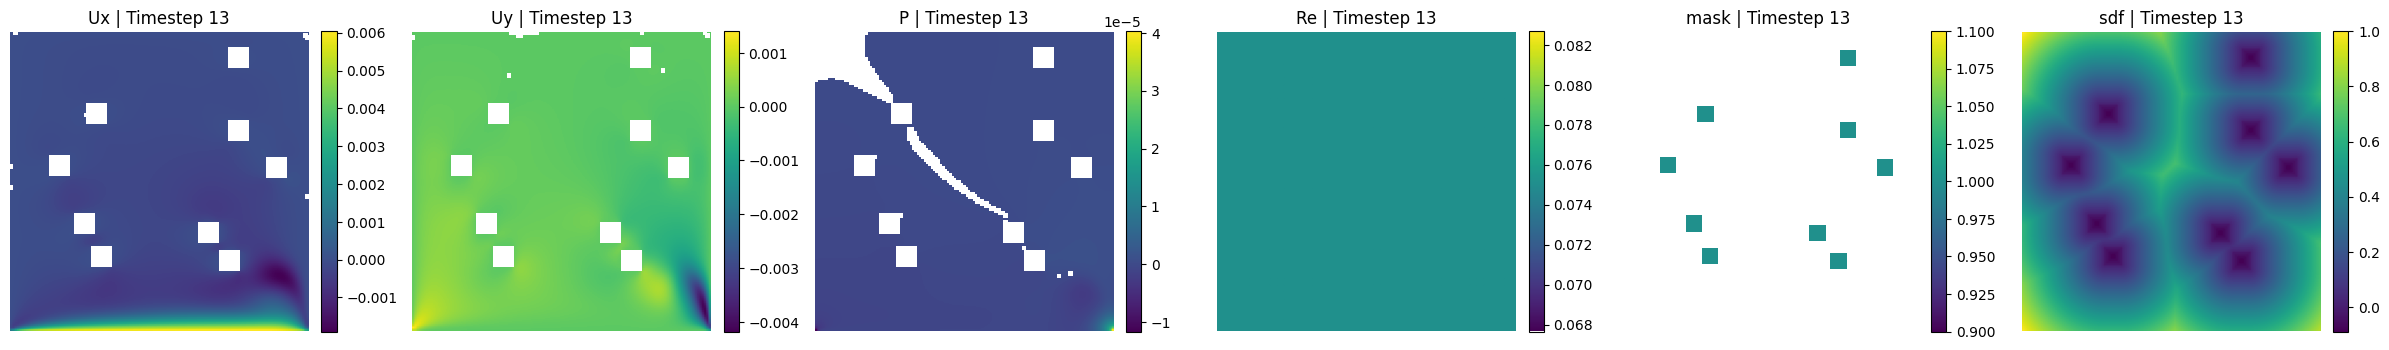

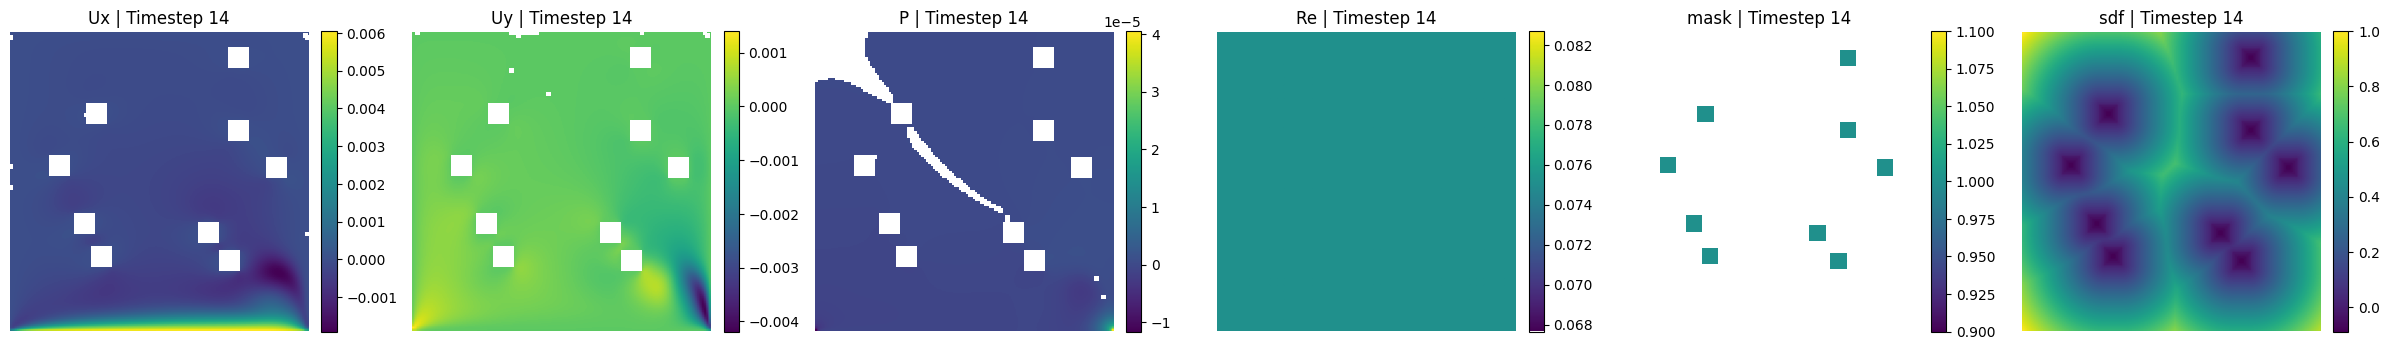

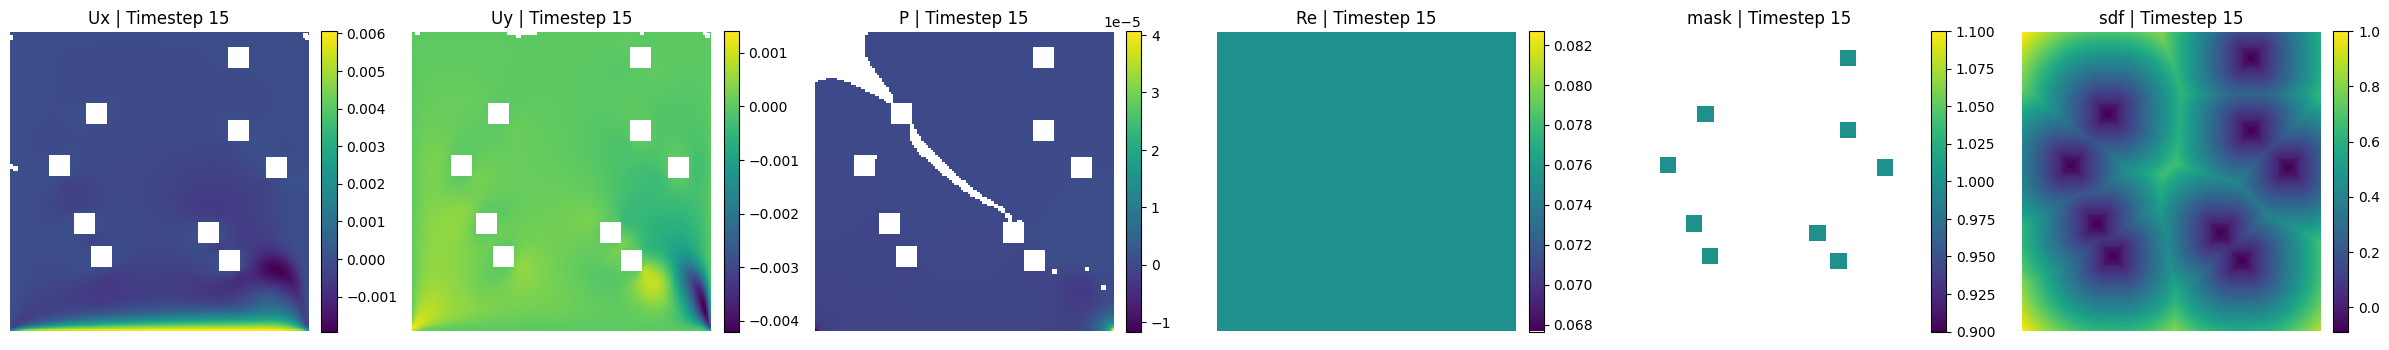

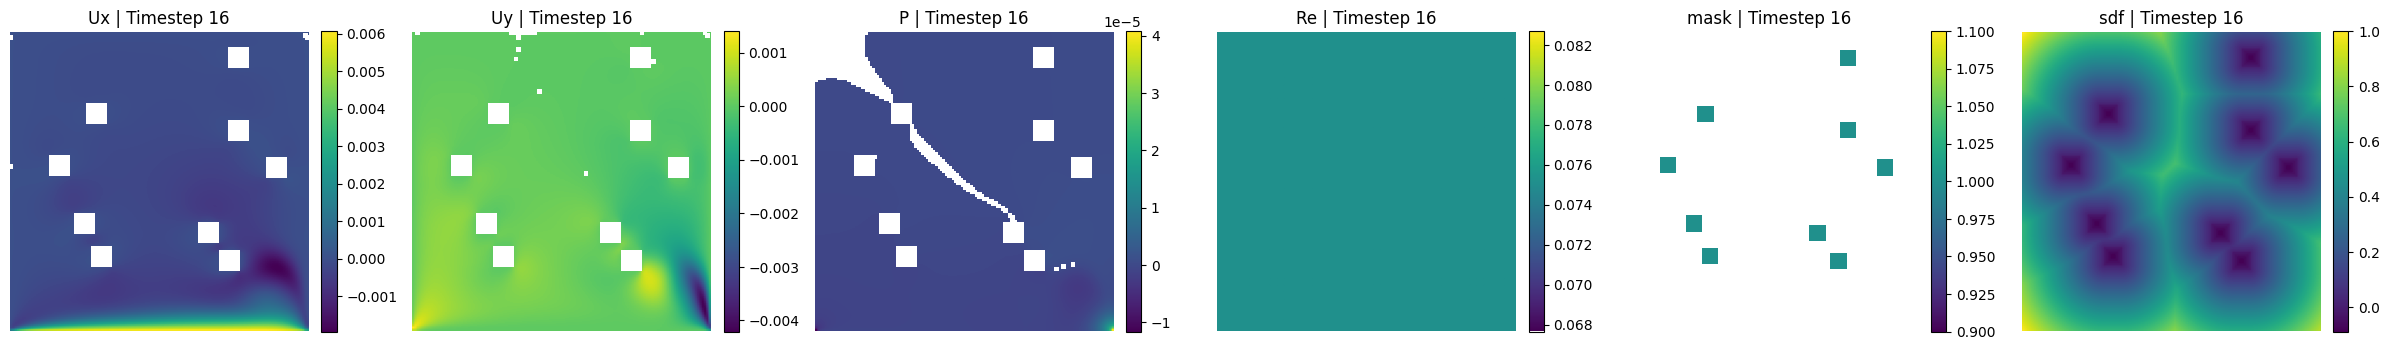

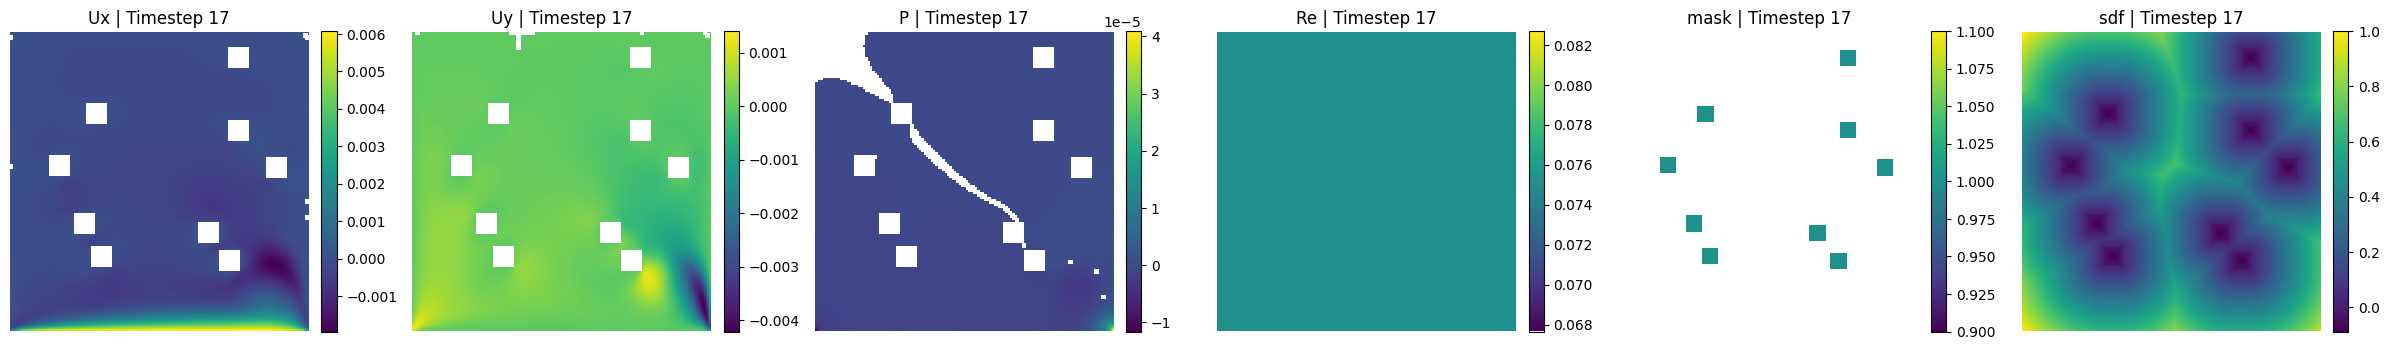

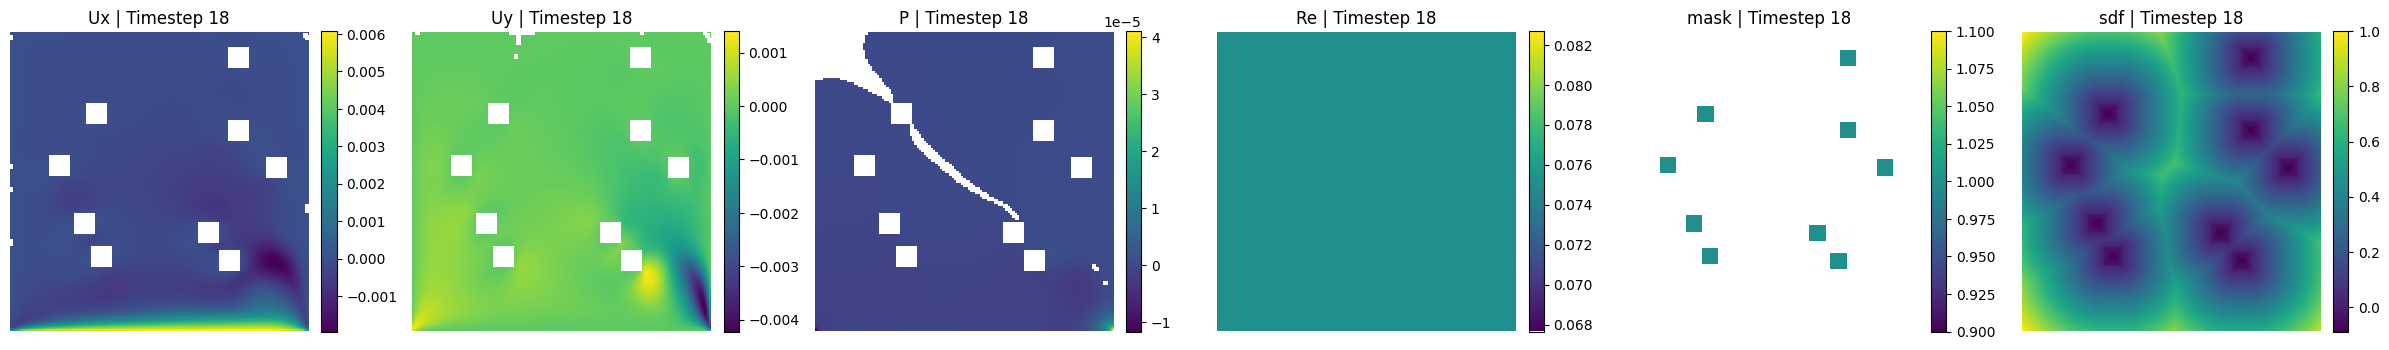

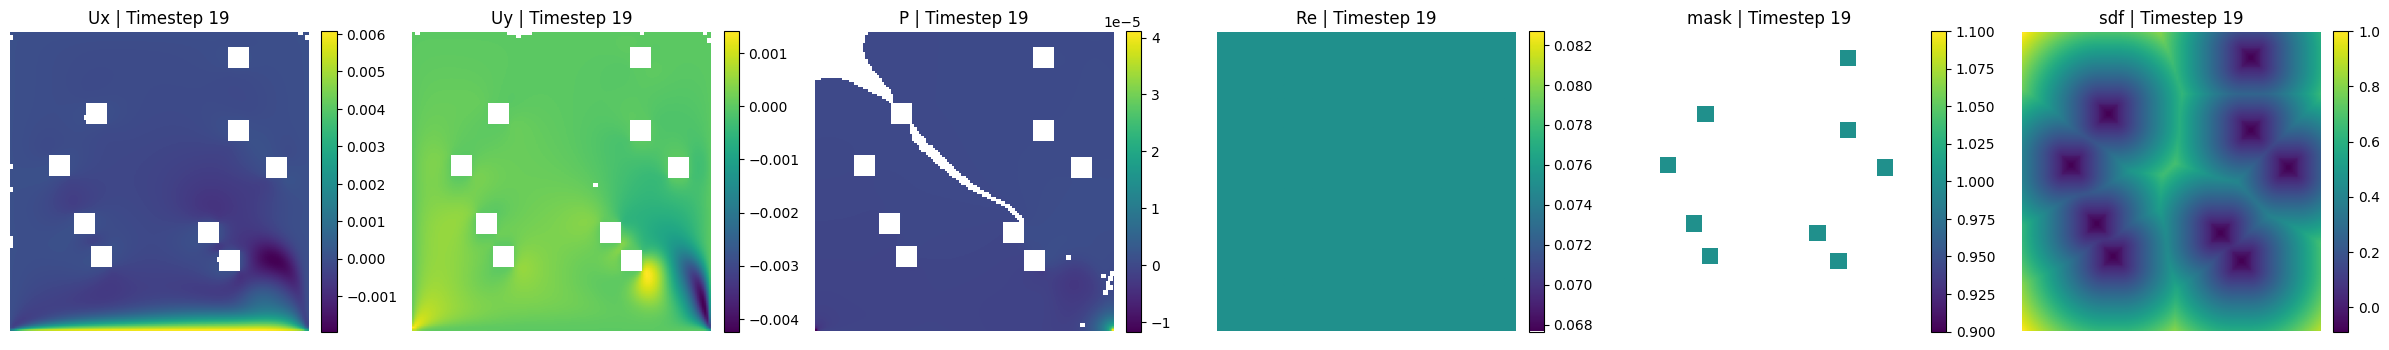

In [5]:
import numpy as np
combined_data = np.load("/data/user_data/user/LDC_Multiple_Holes/batch_overlap_3/results_batch_0.npy")
sample_trajectory = combined_data[0]  # shape: (20,128,128,5)
# sample_timestep = 0
# plot_reshaped_sample(sample_trajectory, sample_timestep, output_folder)
plot_with_hole_white(
sample_trajectory, 
channel_names=["Ux", "Uy", "P", "Re", "mask", "sdf"], 
tol=1e-8
)

In [3]:
def save_grid_to_file(grid, filename):
    """
    Saves the grid values to a text file in a readable format.
    Each row corresponds to a row in the grid, making it easy to verify values.
    """
    df = pd.DataFrame(grid)
    df.to_csv(filename, sep='\t', header=False, index=False)
    print(f"Saved grid values to {filename}")

# For testing the SDF and mask extraction:
def test_sdf_and_mask_extraction():
    # Load data from the testing file (assumes output has shape (..., 128, 128, 9))
    data = np.load("testingsdf.npy")
    
    # According to our new ordering:
    # SDF is in channel 6 and geometry mask is in channel 5.
    sdf_sample = data[0, 0, :, :, 6]         # first trajectory, first timestep, SDF values
    geometry_mask_sample = data[0, 0, :, :, 5] # first trajectory, first timestep, mask values
    
    # Save extracted grids to files.
    save_grid_to_file(sdf_sample, "sdf_values_from_testingsdf.txt")
    save_grid_to_file(geometry_mask_sample, "geometry_mask_from_testingsdf.txt")

In [6]:
import os
import pandas as pd
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)
save_grid_to_file(combined_data[0, 0, :, :, 6], os.path.join(output_folder, "sdf.txt"))
save_grid_to_file(combined_data[0, 0, :, :, 5], os.path.join(output_folder, "mask.txt"))

Saved grid values to output/sdf.txt
Saved grid values to output/mask.txt


In [ ]:
import os
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
import pandas as pd
# ========== HELPER FUNCTIONS (same as before) ==========
def parse_c_contents(c_contents):
    """
    Parses the OpenFOAM cell centers from a given 'c_contents' string.
    Expects the string to contain an 'internalField' entry.
    """
    lines = c_contents.split("\n")
    start_idx = None
    num_centres = None
    for i, line in enumerate(lines):
        if "internalField" in line:
            num_centres = int(lines[i+1].strip())
            start_idx = i + 3
            break
    if start_idx is None or num_centres is None:
        raise ValueError("Could not find 'internalField' or the number of cell centres in the content")
    coordinates = []
    for line in lines[start_idx:start_idx + num_centres]:
        if "(" in line and ")" in line:
            x, y, _ = map(float, line.strip("()\n").split())
            coordinates.append([x, y])
    return np.array(coordinates)
import numpy as np
import os
from scipy.ndimage import distance_transform_edt
def reshape_trajectory_data(sim_data, cell_centers, grid_shape):
    """
    Reshape simulation data (timesteps, num_cells, 4) to a fixed grid of shape
      (timesteps, n_rows, n_cols, 6).
    Input sim_data channels:
      0: Uₓ
      1: U_y
      2: p (pressure)
      3: Reynolds number
    Output grid channels:
      0: Uₓ
      1: U_y
      2: p (pressure)
      3: Reynolds number
      4: Binary mask (1 if fluid domain; 0 if hole)
      5: SDF (signed distance: positive in fluid, negative in hole)
    """
    n_rows, n_cols = grid_shape
    T = sim_data.shape[0]
    # Define Re normalization bounds
    Re_min = 100
    Re_max = 10000
    # Extract and normalize Re ONCE for the entire trajectory
    Re_raw = sim_data[0, 0, 3]
    Re_norm = np.clip((Re_raw - Re_min) / (Re_max - Re_min), 0.0, 1.0)
    # Determine domain boundaries from the cell centers.
    x_min, x_max = np.min(cell_centers[:, 0]), np.max(cell_centers[:, 0])
    y_min, y_max = np.min(cell_centers[:, 1]), np.max(cell_centers[:, 1])
    # Allocate output array with 6 channels.
    reshaped = np.zeros((T, n_rows, n_cols, 6), dtype=np.float32)
    # 2) Create the binary hole mask.
    # Initialize with zeros (assume hole) then mark fluid cells with 1.
    mask = np.ones((n_rows, n_cols), dtype=np.float32)
    mapping = []
    for (x, y) in cell_centers:
        col = int(round((x - x_min) / (x_max - x_min) * (n_cols - 1)))
        row = int(round((y - y_min) / (y_max - y_min) * (n_rows - 1)))
        mapping.append((row, col))
        mask[row, col] = 0  # Mark fluid domain
    # 3) Compute the signed distance function (SDF) on the grid.
    # Use distance_transform_edt on the mask and its inverse.
    outside_dist = distance_transform_edt(mask == 0)
    inside_dist = distance_transform_edt(mask == 1)
    sdf_field = outside_dist - inside_dist
    # # Normalize SDF to range [-1, 1]
    # max_abs = np.max(np.abs(sdf_field))
    # sdf_field = sdf_field / max_abs
    # Normalize SDF to range [-1, 1]
    max_abs_sdf = np.max(np.abs(sdf_field))
    if max_abs_sdf > 0:
        sdf = sdf_field / max_abs_sdf
    # Assign Re to all time steps and all cells
    reshaped[:, :, :, 3] = Re_norm
    # 4) Fill the simulation data into channels 0-4.
    # For each time step, place the 5 channels from sim_data into the grid.
    for t in range(T):
        for i, (row, col) in enumerate(mapping):
            reshaped[t, row, col, 0:3] = sim_data[t, i, 0:3]
    # 5) Set the binary mask channel (channel 5) and SDF channel (channel 6) for every time step.
    for t in range(T):
        reshaped[t, :, :, 4] = mask
        reshaped[t, :, :, 5] = sdf
    return reshaped
def combine_and_reshape_trajectories(dataset, sim_data_list, grid_shape, save_folder, file_name="combined.npy"):
    """
    Combines and reshapes trajectory data from multiple simulations.
    Parameters:
      dataset: np.ndarray of shape (num_trajectories, timesteps, num_cells, 4)
               (4 channels: [Uₓ, U_y, p, Reynolds number])
      sim_data_list: list of dicts, each with keys "folder" and "c_contents"
      grid_shape: tuple (n_rows, n_cols) defining the target grid dimensions.
      save_folder: directory where the combined .npy file will be saved.
      file_name: name of the output .npy file (default "combined.npy").
    Returns:
      combined: np.ndarray of shape (num_trajectories, timesteps, n_rows, n_cols, 6)
      with channels:
          0: Uₓ
          1: U_y
          2: p
          3: Reynolds number
          4: Binary mask (hole indicator)
          5: SDF (signed distance function)
    """
    from tqdm import tqdm
    import gc
    num_trajectories = dataset.shape[0]
    if num_trajectories != len(sim_data_list):
        raise ValueError(f"Number of simulations in .npy ({num_trajectories}) does not match the number of JSON entries ({len(sim_data_list)}).")
    combined_list = []
    for i in tqdm(range(num_trajectories), desc="Reshaping Trajectories"):
        sim_data = dataset[i]  # (timesteps, num_cells, 5)
        entry = sim_data_list[i]
        folder_name = entry["folder"]
        c_contents = entry["c_contents"]
        # Parse the cell centers from the c_contents.
        cell_centers = parse_c_contents(c_contents)
        reshaped_data = reshape_trajectory_data(sim_data, cell_centers, grid_shape)
        combined_list.append(reshaped_data)
        gc.collect()
    combined = np.array(combined_list, dtype=np.float32)
    os.makedirs(save_folder, exist_ok=True)
    save_path = os.path.join(save_folder, file_name)
    np.save(save_path, combined)
    print(f"Saved combined trajectory data at: {save_path}")
    return combined
def save_grid_to_file(grid, filename):
    """
    Saves the grid values to a text file in a readable format.
    Each row corresponds to a row in the grid, making it easy to verify values.
    """
    df = pd.DataFrame(grid)
    df.to_csv(filename, sep='\t', header=False, index=False)
    print(f"Saved grid values to {filename}")
# For testing the SDF and mask extraction:
def test_sdf_and_mask_extraction():
    # Load data from the testing file (assumes output has shape (..., 128, 128, 9))
    data = np.load("testingsdf.npy")
    # According to our new ordering:
    # SDF is in channel 6 and geometry mask is in channel 5.
    sdf_sample = data[0, 0, :, :, 5]         # first trajectory, first timestep, SDF values
    geometry_mask_sample = data[0, 0, :, :, 4] # first trajectory, first timestep, mask values
    # Save extracted grids to files.
    save_grid_to_file(sdf_sample, "sdf_values_from_testingsdf.txt")
    save_grid_to_file(geometry_mask_sample, "geometry_mask_from_testingsdf.txt")
def plot_with_hole_white(
    trajectory,
    channel_names=["Ux", "Uy", "P", "Re", "mask", "sdf"],
    tol=1e-8
):
    """
    Plot each timestep of a trajectory such that values whose absolute value
    is below a given tolerance are displayed as white (masked).
    """
    cmap = matplotlib.cm.get_cmap('gist_ncar').copy()
    cmap.set_bad(color='white')
    n_timesteps = trajectory.shape[0]
    for t in range(n_timesteps):
        data = trajectory[t]
        n_channels = data.shape[-1]
        fig, axes = plt.subplots(1, n_channels, figsize=(4*n_channels, 4))
        for ch in range(n_channels):
            masked_channel = np.ma.masked_where(np.abs(data[:, :, ch]) < tol, data[:, :, ch])
            valid_vals = data[:, :, ch][np.abs(data[:, :, ch]) >= tol]
            if valid_vals.size > 0:
                vmin, vmax = valid_vals.min(), valid_vals.max()
            else:
                vmin, vmax = 0, 1
            im = axes[ch].imshow(masked_channel, cmap=cmap, vmin=vmin, vmax=vmax)
            axes[ch].set_title(f"{channel_names[ch]} | Timestep {t}")
            axes[ch].axis("off")
            fig.colorbar(im, ax=axes[ch], fraction=0.046, pad=0.04)
        plt.tight_layout()
        plt.show()
        plt.close(fig)
def main():
    # List of .npy files (modify this with actual file paths)
    npy_files = [
        "/data/user_data/namancho/FPO_external_hole_location/1results_batch_1.npy",
        "/data/user_data/namancho/FPO_external_hole_location/1results_batch_2.npy",
        "/data/user_data/namancho/FPO_external_hole_location/1results_batch_3.npy",
        "/data/user_data/namancho/FPO_external_hole_location/2results_batch_1.npy",
        "/data/user_data/namancho/FPO_external_hole_location/2results_batch_2.npy",
        "/data/user_data/namancho/FPO_external_hole_location/3results_batch_1.npy",
    ]
    # List of corresponding .json files
    json_files = [
        "/data/user_data/namancho/FPO_external_hole_location/sim_data_batch_1.json",
        "/data/user_data/namancho/FPO_external_hole_location/sim_data_batch_2.json",
        "/data/user_data/namancho/FPO_external_hole_location/sim_data_batch_3.json",
        "/data/user_data/namancho/FPO_external_hole_location/2sim_data_batch_1.json",
        "/data/user_data/namancho/FPO_external_hole_location/2sim_data_batch_2.json",
        "/data/user_data/namancho/FPO_external_hole_location/3sim_data_batch_1.json",
    ]
    # Output folder
    output_folder = "/data/user_data/namancho/FPO_external_hole_location/"
    os.makedirs(output_folder, exist_ok=True)
    # Grid size
    grid_shape = (128, 128)
    # List to store all reshaped batches
    all_batches = []
    # Loop through each pair of .npy and .json files
    for data_path, json_c_file_path in zip(npy_files, json_files):
        print(f"\nProcessing: {data_path} and {json_c_file_path}")
        # 1. Load the simulation data
        print(f"Loading simulation data from {data_path}")
        data = np.load(data_path)
        print(f"Data shape: {data.shape}")
        n_sims = data.shape[0]
        # 2. Load the JSON file
        print(f"Loading JSON file: {json_c_file_path}")
        with open(json_c_file_path, "r") as f:
            raw_entries = json.load(f)
        print(f"Loaded JSON with {len(raw_entries)} entries total.")
        # 3. Verify data consistency
        if len(raw_entries) != n_sims:
            raise ValueError(f"Mismatch: {len(raw_entries)} JSON entries vs {n_sims} simulations.")
        # 4. Reshape the trajectories
        reshaped_data = combine_and_reshape_trajectories(data, raw_entries, grid_shape, save_folder=output_folder)
        print(f"Reshaped data shape: {reshaped_data.shape}")
        # Append to list for final concatenation
        all_batches.append(reshaped_data)
    # Concatenate all batches into one final dataset
    final_data = np.concatenate(all_batches, axis=0)
    final_save_path = os.path.join(output_folder, "final_reshaped_data_norm.npy")
    np.save(final_save_path, final_data)
    print(f"\nFinal combined dataset saved at: {final_save_path}")
    print(f"Final shape: {final_data.shape}")
if __name__ == "__main__":
    main()

In [1]:
import numpy as np

# Paths to all .npy files
npy_files = [
    "/data/user_data/user/combined_LDC_1.npy",
    "/data/user_data/user/combined_LDC_2.npy",
    "/data/user_data/user/LDC_Multiple_Holes_first_batch/results_batch_0.npy",
    "/data/user_data/user/LDC_Multiple_Holes_first_batch/results_batch_1.npy",
    "/data/user_data/user/LDC_Multiple_Holes_second_batch/results_batch_0.npy",
    "/data/user_data/user/LDC_Multiple_Holes_second_batch/results_batch_1.npy"
]

save_path = "/data/user_data/user/final_combined_LDC_Multiple_hole.npy"

# Load all .npy files
loaded_data = [np.load(path) for path in npy_files]

# Print shapes before combining
print("Shapes before combining:")
for i, data in enumerate(loaded_data):
    print(f"File {i+1}: {data.shape}")

# Check if all shapes beyond the first axis are the same
for i in range(1, len(loaded_data)):
    assert loaded_data[i].shape[1:] == loaded_data[0].shape[1:], f"Mismatch in shape between File 1 and File {i+1}"

# Concatenate along the first axis (batch dimension)
final_data = np.concatenate(loaded_data, axis=0)

# Print final shape
print(f"\nCombined shape: {final_data.shape}")

# Save to disk
np.save(save_path, final_data)
print(f"Saved combined file to {save_path}")

Shapes before combining:
File 1: (256, 20, 128, 128, 6)
File 2: (256, 20, 128, 128, 6)
File 3: (128, 20, 128, 128, 6)
File 4: (128, 20, 128, 128, 6)
File 5: (128, 20, 128, 128, 6)
File 6: (128, 20, 128, 128, 6)

Combined shape: (1024, 20, 128, 128, 6)
Saved combined file to /data/user_data/user/final_combined_LDC_Multiple_hole.npy


In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
def plot_with_hole_white(
    trajectory, 
    channel_names=["Ux", "Uy", "P", "Re", "mask", "sdf"], 
    tol=1e-8
):
    """
    Plot each timestep of a trajectory such that any values whose absolute value
    is below a given tolerance are displayed as white (masked),
    while nonzero data use a normal colormap.

    Args:
        trajectory (np.ndarray): Array of shape (timesteps, height, width, channels).
        channel_names (list): Names for the channels.
        tol (float): Tolerance below which values are masked (shown as white).
    """
    # Create a copy of the viridis colormap
    cmap = matplotlib.cm.get_cmap('viridis').copy()
    # Masked values (those < tol in absolute value) will be plotted as white
    cmap.set_bad(color='white')

    n_timesteps = trajectory.shape[0]
    for t in range(n_timesteps):
        data = trajectory[t]  # shape: (height, width, channels)
        n_channels = data.shape[-1]
        
        fig, axes = plt.subplots(1, n_channels, figsize=(4*n_channels, 4))
        
        for ch in range(n_channels):
            # Mask out values whose absolute value is below 'tol'
            masked_channel = np.ma.masked_where(
                np.abs(data[:, :, ch]) < tol,
                data[:, :, ch]
            )
            
            # If you prefer colorbars to scale based on only the unmasked region:
            valid_vals = data[:, :, ch][np.abs(data[:, :, ch]) >= tol]
            if valid_vals.size > 0:
                vmin, vmax = valid_vals.min(), valid_vals.max()
            else:
                # If everything is below tol (i.e., fully masked), pick a small range
                vmin, vmax = 0, 1
            
            im = axes[ch].imshow(masked_channel, cmap=cmap, vmin=vmin, vmax=vmax)
            axes[ch].set_title(f"{channel_names[ch]} | Timestep {t}")
            axes[ch].axis("off")
            fig.colorbar(im, ax=axes[ch], fraction=0.046, pad=0.04)
        
        plt.tight_layout()
        plt.show()
        plt.close(fig)

In [2]:
data = np.load("/data/group_data/sage_lab_complex_geometry/LDC_hole_location_final_reshaped_data_norm.npy")
trajectory = data[0]
plot_with_hole_white(trajectory)

FileNotFoundError: [Errno 2] No such file or directory: '/data/group_data/sage_lab_complex_geometry/LDC_hole_location_final_reshaped_data_norm.npy'